# Recommendation Systems

**Objective:**

Build a recommendation system to recommend products to
customers based on the their previous ratings for other
products.

**Steps followed:**



1.   Install the required package
2.   Load the required libraries
3.   Load the dataset and assign the column names
4.   Analyze the dataset
5.   Take subset of the dataset
6.   Build Popularity based model
7.   Build Collaborative filtering model
8.   Tune the parameters
9.   Compare and conclude the best model


**Install the requried package for Recommendation system**

In [1]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 99kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678230 sha256=76a6ffcf0ee9d672e71176976576d2d6e7a1e1c7abb4c3c9494fd9625fe6cd44
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


**Import all required libraries**

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans

**Mount the drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Assign the column names and load the dataset**

In [5]:

colnames = ["userId", "productId", "Rating", "timestamp"]
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ratings_Electronics.csv", names= colnames)
df.head(30)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


**Analyse the given data**

In [6]:
df.tail(30)

,userId,productId,Rating,timestamp
7824452,A3AENU8Y9HLRAQ,B00LMOH8DU,5.0,1405209600
7824453,ABX8TXRB2GSKO,B00LMOH8DU,5.0,1405468800
7824454,A1QUWXCBPGCQMW,B00LMOH8DU,5.0,1405728000
7824455,A37B1XSZUYNSNK,B00LMOH8DU,5.0,1405036800
7824456,A3FOXB6244Y5PC,B00LNUH5X6,5.0,1404864000
7824457,AELQMX8YAEEYI,B00LOLBBQQ,5.0,1405382400
7824458,AG1NNE1V43RWC,B00LOLBBQQ,1.0,1405468800
7824459,A2QW4HHHC6XWH4,B00LPQRT34,4.0,1405209600
7824460,A2025SOZT6OE6D,B00LS5WBYE,5.0,1405641600
7824461,A2DOJYSPCLCQIT,B00LTAUTHE,5.0,1405382400


In [7]:
df.shape

(7824482, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
Rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
df.describe()

,Rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [10]:
df.isnull().values.any()

False

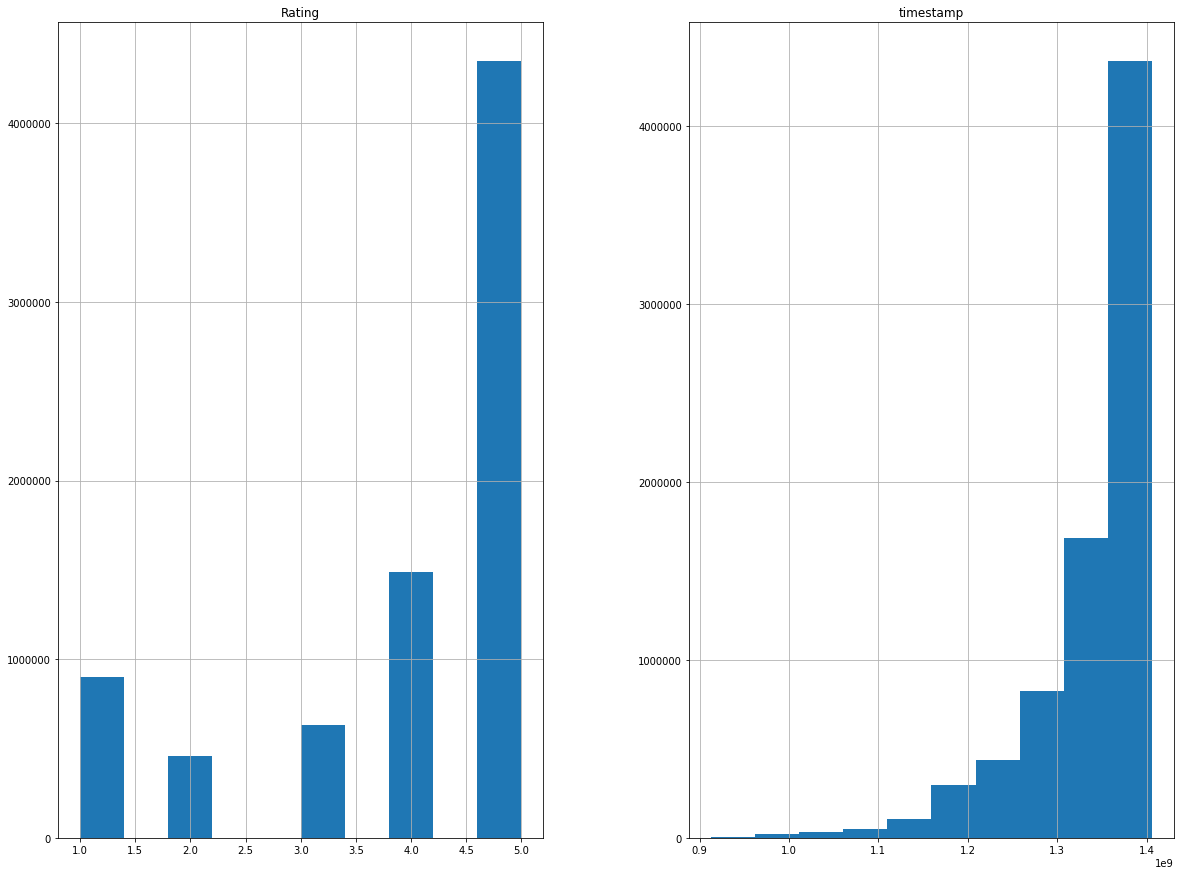

In [11]:
df.hist(figsize=(20, 15))
plt.show()

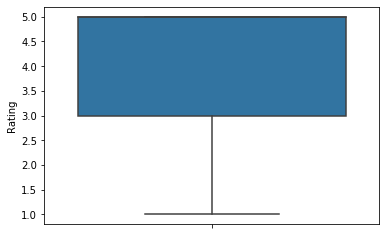

In [12]:
sns.boxplot(y='Rating',data=df)

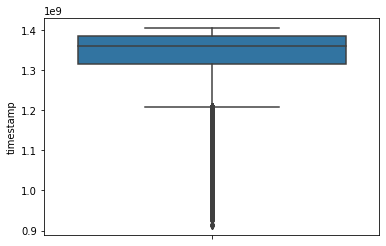

In [13]:
sns.boxplot(y='timestamp',data=df)

**Take subset of data by filtering for users who have given more than 50 users to avoid working with large dataset**

In [14]:
counts=df['userId'].value_counts()
df1=df[df['userId'].isin(counts[counts>=50].index)]
df1.head(30)

,userId,productId,Rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
1003,A2Y4H3PXB07WQI,0972683275,4.0,1292457600
1138,A25RTRAPQAJBDJ,0972683275,5.0,1329523200
1310,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1322,A1A5KUIIIHFF4U,1400501466,1.0,1332547200


In [15]:
df1.shape

(125871, 4)

# **Popularity based filtering based on Product's ratings**

In [16]:
products_df = pd.DataFrame(df1.groupby('productId')['Rating'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df1.groupby('productId')['Rating'].count())
products_df.head()

,Rating,product_rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [17]:
products_df.sort_values('Rating', ascending=False).head()

,Rating,product_rating_counts
productId,,
0594451647,5.0,1
B003RRY9RS,5.0,1
B003RR95Q8,5.0,1
B003RIPMZU,5.0,1
B003RFRNYQ,5.0,2


In [18]:
products_df.sort_values('product_rating_counts', ascending=False).head()

,Rating,product_rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


# **Popularity based filtering based on User's ratings**

In [19]:
users_df = pd.DataFrame(df1.groupby('userId')['Rating'].mean())
users_df['user_rating_counts'] = pd.DataFrame(df1.groupby('userId')['Rating'].count())
users_df.head()

,Rating,user_rating_counts
userId,,
A100UD67AHFODS,4.508621,116
A100WO06OQR8BQ,3.651515,132
A105S56ODHGJEK,3.838235,68
A105TOJ6LTVMBG,3.845070,71
A10AFVU66A79Y1,4.184615,65


In [20]:
users_df.sort_values('Rating', ascending=False).head()

,Rating,user_rating_counts
userId,,
A23WPWLYT3P1CZ,5.0,57
A2DKQQIZ793AV5,5.0,75
A2J4XMWKR8PPD0,5.0,58
A2PB325LKXYDOL,5.0,63
A2TN0U8173HM7A,5.0,66


In [21]:
users_df.sort_values('user_rating_counts', ascending=False).head()

,Rating,user_rating_counts
userId,,
A5JLAU2ARJ0BO,3.861538,520
ADLVFFE4VBT8,4.283433,501
A3OXHLG6DIBRW8,4.451807,498
A6FIAB28IS79,4.183295,431
A680RUE1FDO8B,4.406404,406


# **Collaborative based filtering and get the scores for different models**

In [22]:
reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df1[['userId', 'productId', 'Rating']], reader)

# Use the famous SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9842  0.9897  0.9850  0.9721  0.9858  0.9834  0.0059  
MAE (testset)     0.7265  0.7303  0.7289  0.7222  0.7285  0.7273  0.0028  
Fit time          6.32    6.30    6.29    6.32    6.26    6.30    0.02    
Test time         0.21    0.29    0.29    0.29    0.21    0.26    0.04    


{'fit_time': (6.320570230484009,
  6.300092458724976,
  6.292995452880859,
  6.3234639167785645,
  6.258005619049072),
 'test_mae': array([0.7265179 , 0.73031273, 0.72889027, 0.72216649, 0.72847171]),
 'test_rmse': array([0.98422141, 0.98974344, 0.98498668, 0.97209063, 0.98575215]),
 'test_time': (0.21454262733459473,
  0.2912914752960205,
  0.292050838470459,
  0.29150867462158203,
  0.2101912498474121)}

In [23]:
# Split the data into 70% / 30%
trainset, testset = train_test_split(data, test_size=.30)

# Run SVD algorithm
svd=SVD()

#Build the model
svd.fit(trainset)
predictions=svd.test(testset)

# Compute errors

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9851
MAE:  0.7308


0.7307667331193174

In [24]:
#Define userid and productid in the string format as required

uid=str(150)
pid=str(10000)

# Get predictions

pred=svd.predict(uid, pid, r_ui=4, verbose=True)

user: 150        item: 10000      r_ui = 4.00   est = 4.26   {'was_impossible': False}


In [25]:

param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

{'rmse': 0.9890760019452024, 'mae': 0.7470791113063835}
{'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}


In [26]:
# GridSearch with KNNbasic

param_grid = {'min_k':[2,3,4], 'k':[5,10,20] }
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi